# Automatic Feature Selection
Techniches to reduce the number of features and maybe avoid overfitting

## Univariate Statistics
Compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_selected.shape: {X_train_selected.shape}")

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

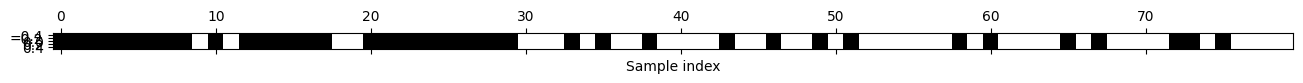

In [3]:
#Returns a Boolean mask of the selected features
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

#### Comparing the performance of logistic regression on all features against the performance using only the selected features

In [4]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(f"Score with all features: {lr.score(X_test, y_test):.3f}")
lr.fit(X_train_selected, y_train)
print(f"Score with only selected features: {lr.score(X_test_selected, y_test):.3f}")

Score with all features: 0.951
Score with only selected features: 0.933


For high values of max_iter (>2000) the performance is better for all features.

## Model-Based Feature Selection
Use supervised machine learning model to judge the importance of each feature, and keeps only the most important ones

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#The SelectFromModel class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

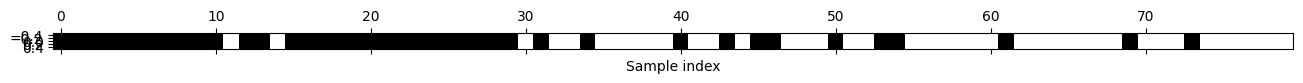

In [6]:
#Taking a look at the features selected by the RandomForestClassifier
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [7]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f"Score with L1-based feature selection: {score:.3f}")

Score with L1-based feature selection: 0.947
